# Laporan Proyek Machine Learning - I Kadek Adi Memes Subagia


# Domain Proyek
 <h1>Analisa Pergerakan Harga Bitcoin</h1>

 <p>Bitcoin atau yang biasa kita kenal dengan BTC adalah salah satu mata uang digital atau yang kita kenal dengan cryptocurrency, hal ini menjadi sangat tren dan banyak sekali orang -orang yang mulai menaruh sebagian penghasilannya kedalam cryptocurrency. terutama pada Bitcoin ini karena Bitcoin menduduki Top 1 cryptocurrency dengan harga market tertinggi. bisa dilihat pada website <a href ="https://coinmarketcap.com/id/">Coinmarketcap</a></p> <br>
 Kenapa saya mengambil permasalahan ini adalah karena ini sedang panas - panasnya di indonesia, dimana banyak konten kreator yang sudah mengedukasi kita untuk mulai investasi pada coin inii, tapii kita sebagai individu tidak boleh asal percaya dengan ajakan konten kreator yang mengajak menaruh uang kita pada Bitcoin sebelum kita tahu apa itu Bitcoin?? dan apa aja sihh yang mempengaruhi Bitcoin itu bisa naik atau turun. <br>

 Nahhh karena ini adalah uang digital yang harganya tidak bisa di prediksi dengan hanya insting kita hehehehe, kita perlu adanya pemahaman mengenai cryptocurrency dan pada kesempatan ini saya mencoba mengambil contoh di Bitcoin.

# Business Understanding

Dari Latar belakang di atas mengenai kenapa saya mengambil contoh ini pada proyek saya, saya mendapati dua problem yaitu:

## Problem
*   Apa Saja Faktor yang mempengaruhi Kenaikan dan penurunan Harga Bitcoin ?
*   Apakah Bitcoin Layak di Investasikan Jangka Panjang ?

## Goals

*   Memeriksa faktor yang memiliki Hubungan erat dengan Harga Bitcoin
*   Membuat sebuah Model yang bisa memberikan prediksi harga Bitcoin satu tahun kedepan, dengan data yang ada.

## Solution statements

*   Untuk Permasalahan pertama saya akan membuat sebuah visualisasi data berupa heatmap yang menunjukan korelasi antar setiap fitur dari Bitcoin untuk melihat fitur apa saja yang memiliki korelasi dari harga bitcoin
*   Permasalahan kedua saya akan membuat sebuah model prediksi menggunakan algoritma Random Forest untuk memprediksi harga dengan menggunakan data yang saya miliki.








## Mempersiapkan Envirotment

pada proyek ini saya menggunakan beberapa libary python yaitu:

*   Pandas
*   numpy
*   matplotlib
*   Seaborn

Dan pada proyek ini saya menggunakan algoritma supervised learning yaitu Random Forest





In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Data Understanding

Untuk menyelesaikan masalah yang sudah saya sampaikan di atas, disini saya akan menggunakan dataset yang disediakan secara grartis pada Kaggle <br>
[Dataset](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory/data) <br>

data yang saya ambil adalah data historical dari Cryptocurrency dalam dataset ini terdapat 23 historical dari Cryptocurrency yang ada, namun karena latar belakang ini mengenai Bitcoin jadi saya hanya mengambil data untuk coin BTC saja.

## Mengambil Dataset Yang Sudah Di Download

In [45]:
url = "/content/drive/MyDrive/coin_Bitcoin.csv"
BTC = pd.read_csv(url)

BTC

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


Dari Data tersebut Terlihat pada daaset ini terdapat 2991 baris yang terdiri dari 10 kolom:

*   SNo : yang menunjukan nomor dari data
*   Name : adalah menunjukan nama coin dari Cryptocurrency yaitu Bitcoin
*   Symbol : yaitu symbol dari nama Bitcoin yaitu BTC
*   Date : menunjukan tanggal data yang diambil yaitu mulai dari 2013 - 2021
*   High : kolom ini menunjukan harga tertinggi yang dicapai oleh Bitcoin berdasarkan tanggalnya
*   Low : ini adalah kebalikan dari Kolom HIgh, pada kolom ini menunjukan harga terendah dari Bitcoin pada Tanggal tersebut
*   Open : kolom ini merupakan harga pembuka dari koin Bitcoin
*   CLose : yang merupakan harga penutup dari Bitcoin di tanggal tersebut
*   Marketcap : kolom ini menunjukan berapa total aset Bitcoin yang berada dalam pasar Crypto



## EDA (Eksplorasi Data Analysis)

Disini saya akan mencoba menelusuri data dari histori Bitcoin, apakah terdapat missing value, datatype yang salah dan mencoba memvisualisasi data untuk menyelesaikan permasalahan yang ada di latar belakang.


In [3]:
BTC.shape

(2991, 10)

In [4]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


Dari Info ini bisa dilihat terdapat kesalahan type data yang ada, yang mana pada kolom Date seharusnya bertype datetime namun pada data ini bertipe object. maka kita harus memperbaikinya

In [5]:
BTC.isnull().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


Dilihat Dari Data Tidak ada memiliki missing value.

Memperbaiki Dataset

In [6]:
BTC['Date'] = pd.to_datetime(BTC['Date'])
BTC.sort_values(by='Date', inplace=True)

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


Type Data sudah Di perbaiki.

## Pergerakan Harga Crypto

Disini saya mencoba untuk memvisualisasikan Pergerakan Harga Bitcoin dari awal data sampe data yang terakhir dengan memanfaatkan beberapa kolom yaitu:

*   Open
*   Close
*   High
*   Low
*   Date

disini saya membuat data Open, Close, High dan Low memiliki warna masing-masing supaya lebih jelas untuk dilihat, kemudian saya buat date berada pada label X dan menambahkan label y dengan nama Price (USD)


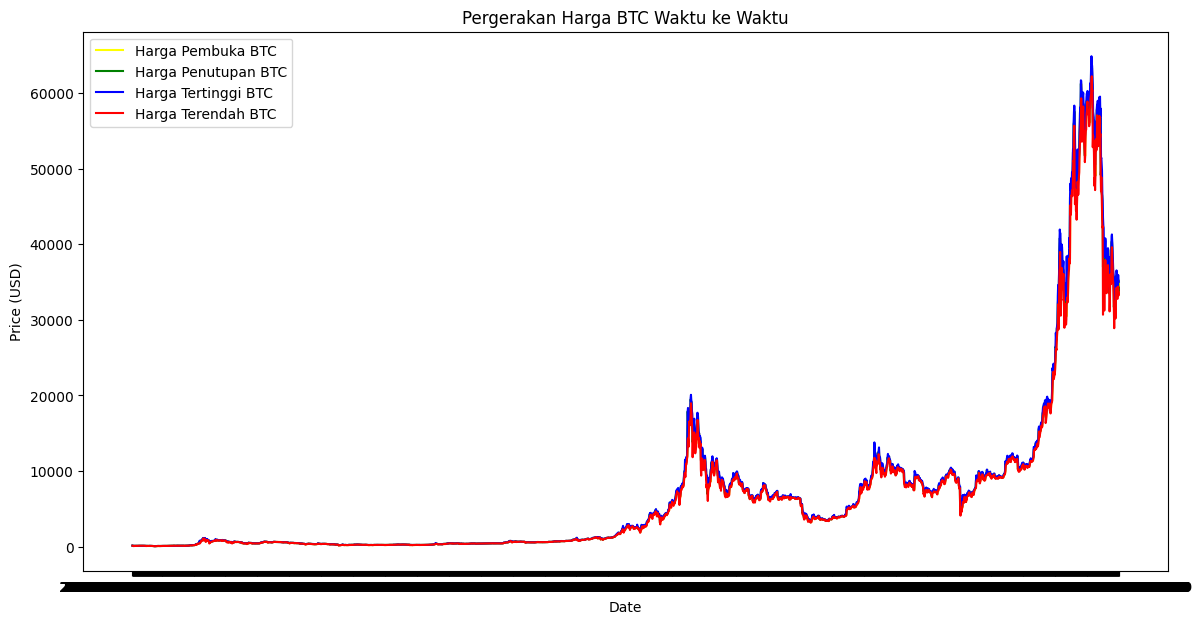

In [22]:
plt.figure(figsize=(14, 7))

plt.plot(BTC['Date'], BTC['Open'], label='Harga Pembuka BTC', color='yellow')
plt.plot(BTC['Date'], BTC['Close'], label='Harga Penutupan BTC', color='Green')
plt.plot(BTC['Date'], BTC['High'], label='Harga Tertinggi BTC', color='blue')
plt.plot(BTC['Date'], BTC['Low'], label='Harga Terendah BTC', color='red')
plt.title('Pergerakan Harga BTC Waktu ke Waktu')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Dilihat Dari Data Ini Pergerakan Bitcoin dari 4 tahun terakhir yaitu 2018 - 2021 mengalami kenaikan yang sangat pesat.

### Bagaimana Rata - Rata Harga Penutupan Pada jangka Tahunan, Bulanan dan Minggu

Saya memvisualisasikan supaya mengetahui seberapa drastis kenaikan dan penurunan koin Bitcoin pada jangkoan Tahun,Bulan dan Minggu

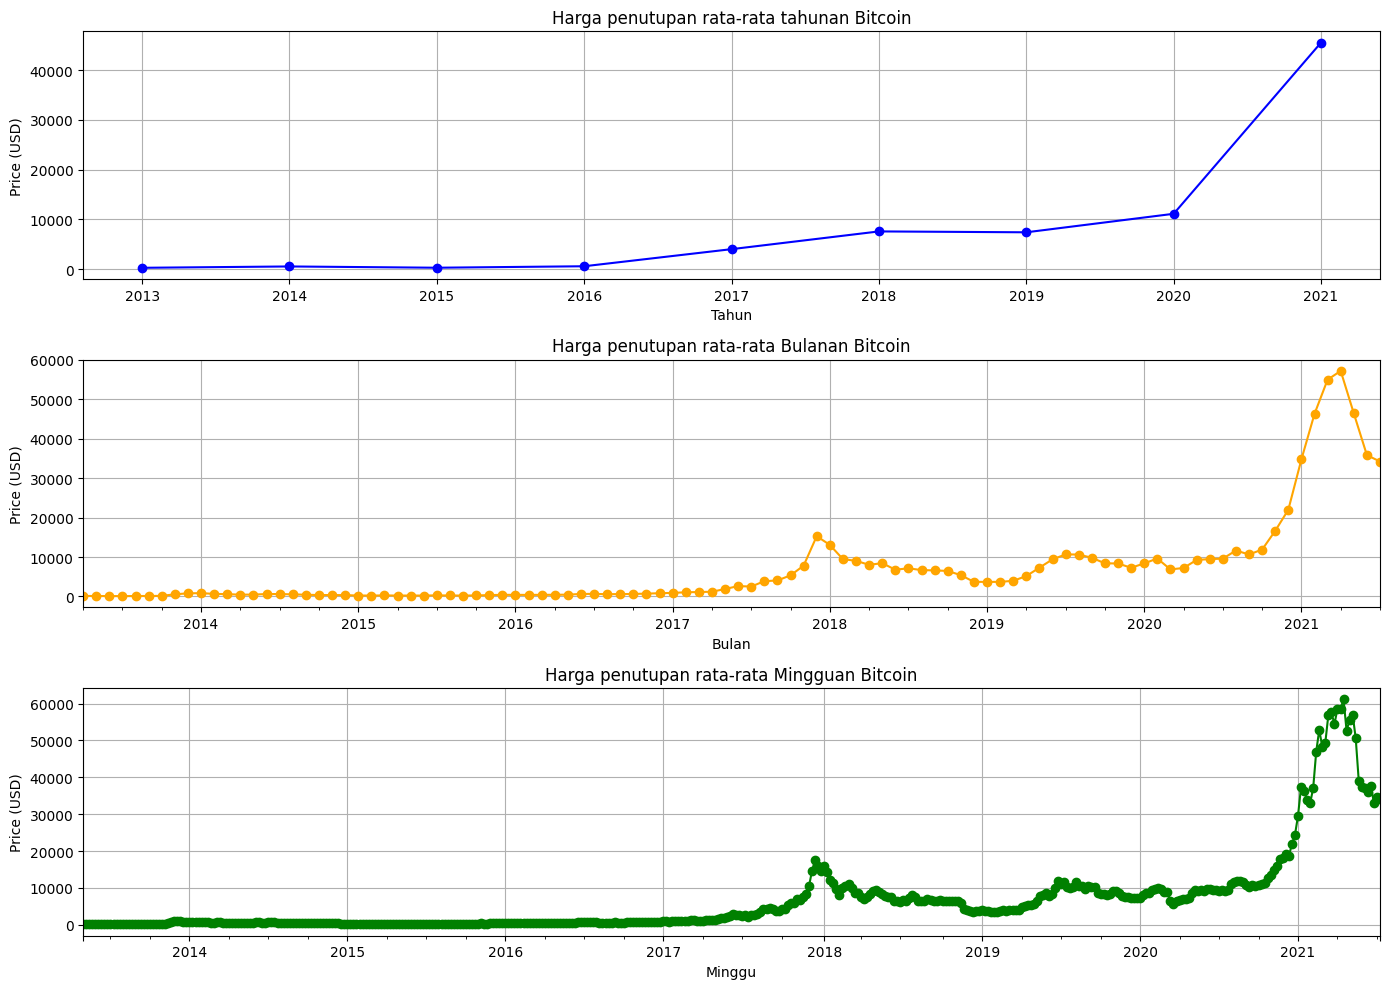

In [24]:
# convert kolom data menjadi datetime.
BTC['Date'] = pd.to_datetime(BTC['Date'])

# Menghitung rata-rata harga penutup per tahun Calculate
BTC['Year'] = BTC['Date'].dt.year
yearly_trend = BTC.groupby('Year')['Close'].mean()

# Menghitung rata-rata harga penutup per Bulan Calculate
BTC['Month'] = BTC['Date'].dt.to_period('M')
monthly_trend = BTC.groupby('Month')['Close'].mean()

# Menghitung rata-rata harga penutup per Minggu Calculate
BTC['Week'] = BTC['Date'].dt.to_period('W')
weekly_trend = BTC.groupby('Week')['Close'].mean()


plt.figure(figsize=(14, 10))

# Visualisasi Tahun
plt.subplot(3, 1, 1)
yearly_trend.plot(marker='o', color='blue')
plt.title('Harga penutupan rata-rata tahunan Bitcoin')
plt.xlabel('Tahun')
plt.ylabel('Price (USD)')
plt.grid(True)

# Visualisasi Bulan
plt.subplot(3, 1, 2)
monthly_trend.plot(marker='o', color='orange')
plt.title('Harga penutupan rata-rata Bulanan Bitcoin')
plt.xlabel('Bulan')
plt.ylabel('Price (USD)')
plt.grid(True)

# Visualisasi Minggu
plt.subplot(3, 1, 3)
weekly_trend.plot(marker='o', color='green')
plt.title('Harga penutupan rata-rata Mingguan Bitcoin')
plt.xlabel('Minggu')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()

Dilihat Dari 3 Grafik Di atas Bisa:


*   Pada Grafik Tahunan, Bisa dilihat Kenaikan Nilai Bitcoin dimulai dari tahun 2016 sampai 2021, kenaikan yang dialami terus menerus.
*   Pada Grafik kedua terlihat lonjakan yang cukup tinggi pada bulan 2020 sampai 2021 dan kemudian mengalami koreksi untuk menjaga harga pasa.
*   Pada Grafik ketiga kita bisa melihat dengan jelas bagaimana flukuatifnya harga Bitcoin di pasar, kita bisa melihat dimana bitcoin sempat naik pada tahun 2017 - 2018 dan mengalami koreksi kemudian meningkat lagi pada tahun 2020 - 2021.

Kesimpulan dari grafik ini adalah puncak dari harga BTC atau All Time High nya berada pada maret 2021. dan bisa disimpulkan juga Bitcoin bisa menjadi salah satu pilihan investasi jika dilihat dari grafiknya





## Melihat Korelasi Dari BTC

Untuk menjawab pertanyaan pertama pada latar belakang yaitu: <br>
"Apa Saja Faktor yang mempengaruhi Kenaikan dan penurunan Harga Bitcoin ?" <br>
saya menggunakan teknik visualisasi Heatmap guna mengetahui korelasi dari setiap feature yang ada dalam Data Bitcoin tersebut. <br>
dengan berpacu pada kolom Close yang merupakan harga penutup dari Bitcoin

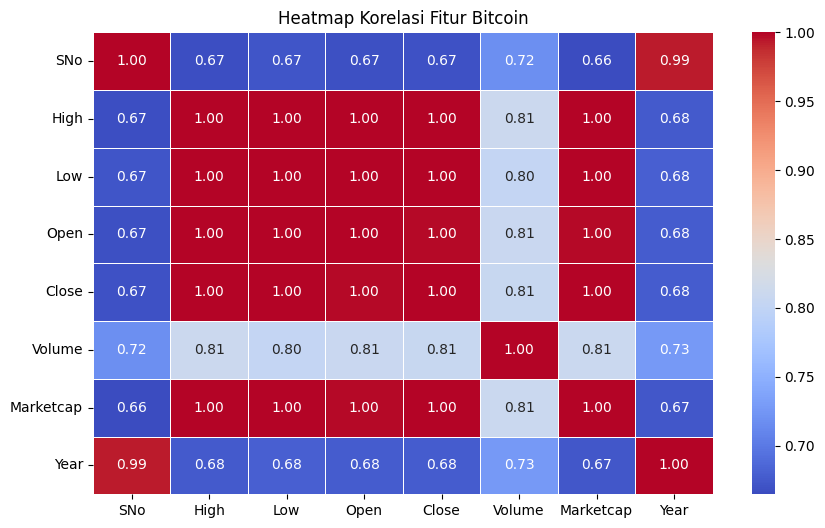

In [11]:
numerical_features = BTC.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sbn.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Bitcoin')
plt.show()

## Fitur Yang mempengaruhi Harga Bitcoin

Dilihat dari Heatmap di atas, kita bisa melihat bahwa yang memiliki korelasi kuat dengan harga Bitcoin yaitu:


*   Open
*   Low
*   High
*   Marketcap

Jadi untuk menmbuat prediksi dari harga BTC kita bisa menggunakan fitur tersebut menjadi acuannya. dengan targetnya dalah close yaang merupakan harga penutupan dari Bitcoin<br>

jadi bisa disimpulkan untuk jawaban dari permasalahan pertama sudah bisa dijawab.


# Modeling dan Evaluasi

Untuk Menjawab pertanyaan nomor dua saya menggunakan algoritma random forest.  <br>

## Random Forest
menggunakan Random Forest karena menurut saya algoritma ini cocok untuk menangani data yang lumayan kompleks, walaupun pada permaslahaan ini memiliki kekurangan juga yaitu kurang akurat untuk memprediksi jangka panjang dan ada alternatifnya yaitu menggunakan LSTM (Long Short-Term Memory) <br> namun karen saya belum mengetahui mengenai LSTM (Long Short-Term Memory) saya akan menggunakan Random Forest Untuk kasus ini


# Algoritma Random Forest

In [59]:
# Pastikan BTC hanya memiliki fitur yang dipilih
BTC = BTC[['Open', 'High', 'Low', 'Volume', 'Marketcap', 'Close']]

# Pilih fitur dan target
X = BTC[['Open', 'High', 'Low', 'Volume', 'Marketcap']]
y = BTC['Close']

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Latih model
rf.fit(X_train, y_train)

# Prediksi pada data testing
# Use X_test for prediction to get predictions for the test set
y_pred = rf.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 53.313980195671896
Mean Squared Error (MSE): 15065.236109044139
Root Mean Squared Error (RMSE): 122.74052349995962
R-squared (R²) Score: 0.9998463119068502


Dari Hasil Evaluasi kita bisa melihat nilai yang didapatkan perfoma dari Model yang kita gunakan. <br>



*   Mean Absolute Error (MAE): 53.313980195671896
*   Mean Squared Error (MSE): 15065.236109044139
*   Root Mean Squared Error (RMSE): 122.74052349995962
*   R-squared (R²) Score: 0.9998463119068502







# Testing Model

Disini saya mencoba menggunakan Testing model untuk prediksi harga Bitcoin Satu Tahun kedepan

In [60]:
# Simpan prediksi selama 365 hari
future_prices = []
latest_data = X.iloc[-1:].copy()  # Ambil data terbaru

# Prediksi selama 365 hari ke depan
for i in range(365):
    latest_data['Volume'] *= 1.01  # Naik 1% per hari
    latest_data['Marketcap'] *= 1.005  # Naik 0.5% per hari

    # Prediksi harga BTC
    predicted_price = rf.predict(latest_data[['Open', 'High', 'Low', 'Volume', 'Marketcap']])[0]
    future_prices.append(predicted_price)

    # Update latest_data dengan harga prediksi terbaru
    latest_data['Open'] = predicted_price
    latest_data['High'] = predicted_price * 1.01
    latest_data['Low'] = predicted_price * 0.99

# Simpan hasil prediksi ke dalam DataFrame
future_df = pd.DataFrame({'Hari': np.arange(1, 366), 'Prediksi Harga BTC': future_prices})

# Menampilkan prediksi untuk 1 tahun mendatang
print(future_df)

     Hari  Prediksi Harga BTC
0       1        34483.832703
1       2        34568.627373
2       3        34642.286209
3       4        34883.417527
4       5        35086.049937
..    ...                 ...
360   361        62444.511763
361   362        62444.511763
362   363        62444.511763
363   364        62444.511763
364   365        62444.511763

[365 rows x 2 columns]


# Kesimpulan

Dari Hasil Evaluasi tersebut saya bisa ambil kesimpulan bahwa Model yang menggunakan algoritma random forest berjalan dengan baik, dengan nilai R2 mendekati 1, tetapi tidak menutup kemungkinan nilai tersebut buruk karena overfiting dari data.<br>

apakah ini bisa menjawab pertanyaan Nomor 2??? <br>
menurut saya bisa digunakan, namun perlu diingatkan pada dunia Crypto ada banyak faktor lainnya, mulai dari berita suku bunga AS, kebijakan pemerintah dan lainnya lagi. <br>
namun model ini menurut saya bisa di pakai jika hanya untuk memvisualisasi prediksi saja.